In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from keras.preprocessing import image
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import tqdm

X = np.load('x_letters.npy')
y = np.load('y_letters.npy')

X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)

y_tensor = tf.convert_to_tensor(y, dtype=tf.int32)
batch_size = 4000
img_size = 28
n_class = 26
noise_dim = 100
epoch_count = 10000

dataset = tf.data.Dataset.from_tensor_slices((X_tensor, y_tensor))
dataset = dataset.shuffle(buffer_size=1000).batch(batch_size)


2025-11-16 11:38:50.233430: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:497] Allocator (GPU_0_bfc) ran out of memory trying to allocate 265.57MiB (rounded to 278473728)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-11-16 11:38:50.233481: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1053] BFCAllocator dump for GPU_0_bfc
2025-11-16 11:38:50.233491: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1060] Bin (256): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2025-11-16 11:38:50.233494: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1060] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2025-11-16 11:38:50.233496: I exte

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [2]:
from tensorflow.keras import layers, Sequential

def generator_loss(generated_images, target_images):
    alpha=0.8
    mse_loss = tf.reduce_mean(tf.square(generated_images - target_images))

    # SSIM term (SSIM returns a value between -1 and 1)
    ssim_score = tf.image.ssim(
        tf.expand_dims(generated_images, -1),
        tf.expand_dims(target_images, -1),
        max_val=1.0
    )
    ssim_loss = 1 - tf.reduce_mean(ssim_score)  # we minimize (1 - SSIM)

    # Combine them
    total_loss = alpha * mse_loss + (1 - alpha) * ssim_loss
    return total_loss


class Generator(tf.keras.Model):
    def __init__(self):
        super(Generator, self).__init__()
        self.net = Sequential([
            layers.Dense(14 * 14, activation="relu"),
            layers.Dense(21 * 21, activation="relu"),
            layers.Dense(28 * 28, activation="sigmoid"),
        ])

    def call(self, noise, labels):
        x = tf.concat([noise, labels], axis=1)
        x = self.net(x)
        x = tf.reshape(x, [-1, 28, 28])
        return x

g_model = Generator()

In [3]:
import string


def generate_all_letters(generator, latent_dim, img_size=(28, 28)):
    num_letters = 26
    plt.figure(figsize=(22, 20))

    for i, letter in enumerate(string.ascii_uppercase):
        latent_vector = tf.random.normal(shape=(1, latent_dim))
        label = tf.one_hot([i], depth=26)
        generated_image = generator(latent_vector, label)

        plt.subplot(1, num_letters, i + 1)
        plt.imshow(generated_image[0], cmap='gray')
        plt.axis('off')
        plt.title(letter, fontsize=8)

    plt.tight_layout()
    plt.show()

2025-10-14 19:33:20.645029: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


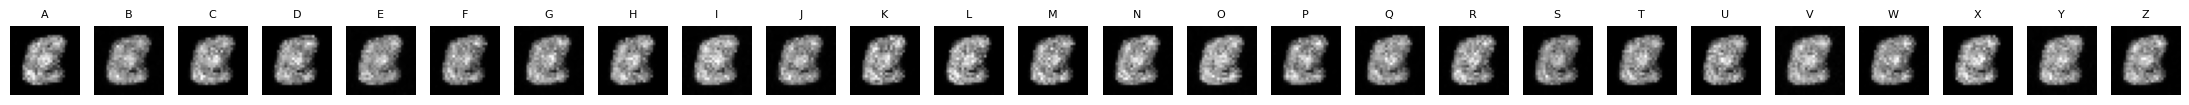

Epoch 1/100, Loss: 0.2849


2025-10-14 19:33:21.974889: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


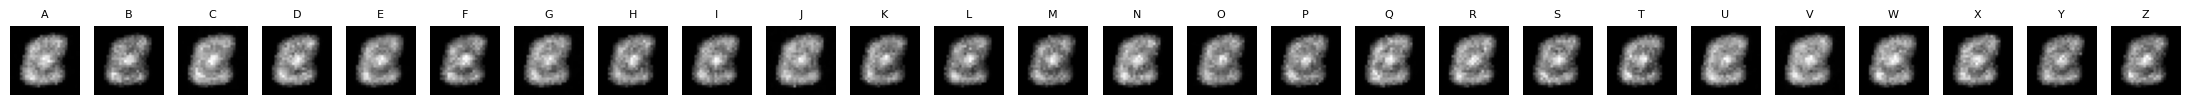

Epoch 2/100, Loss: 0.2545


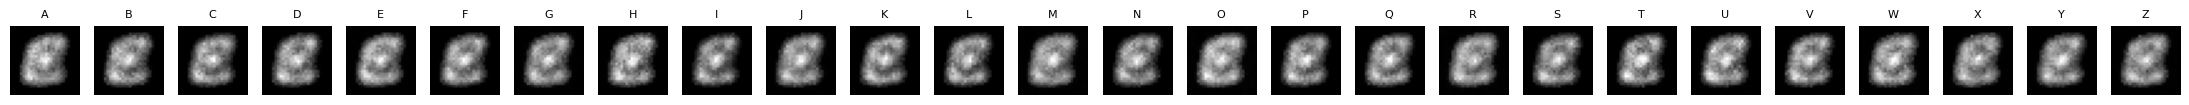

Epoch 3/100, Loss: 0.2524


2025-10-14 19:33:24.684181: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


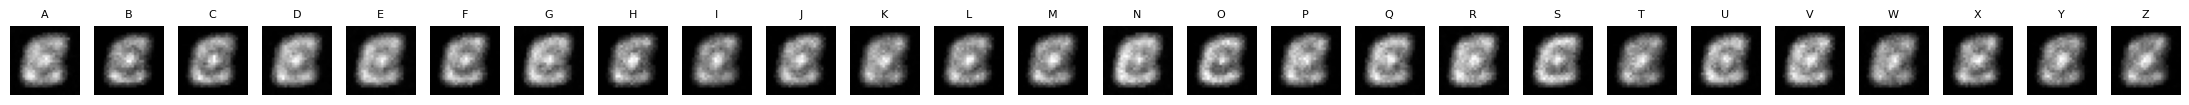

Epoch 4/100, Loss: 0.2503


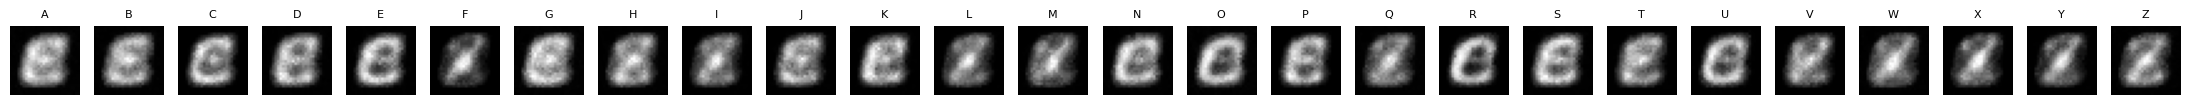

Epoch 5/100, Loss: 0.2448


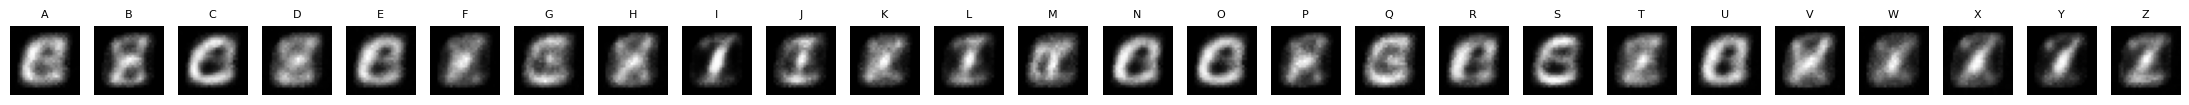

Epoch 6/100, Loss: 0.2364


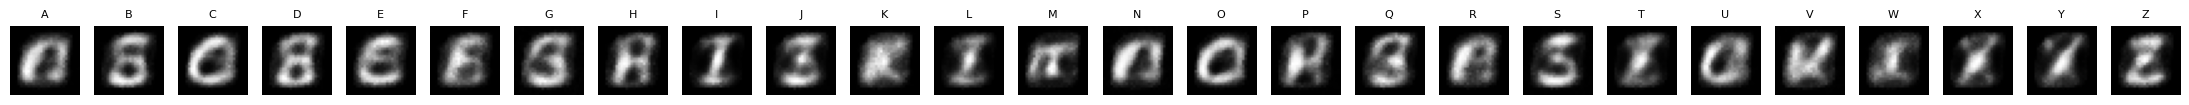

Epoch 7/100, Loss: 0.2287


2025-10-14 19:33:30.116015: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


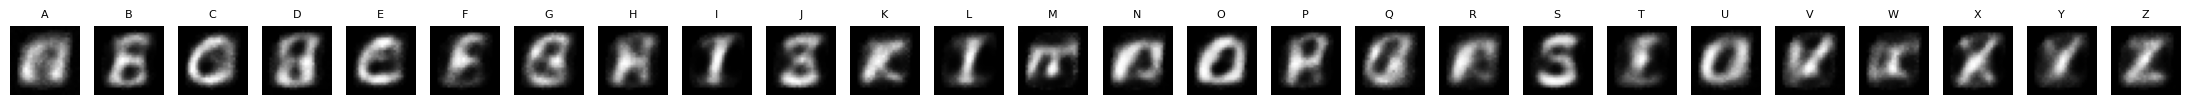

Epoch 8/100, Loss: 0.2230


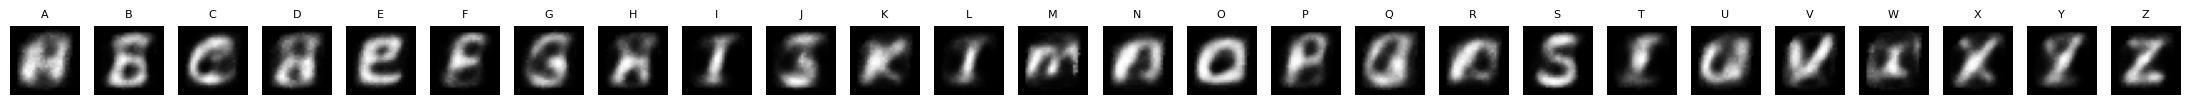

Epoch 9/100, Loss: 0.2188


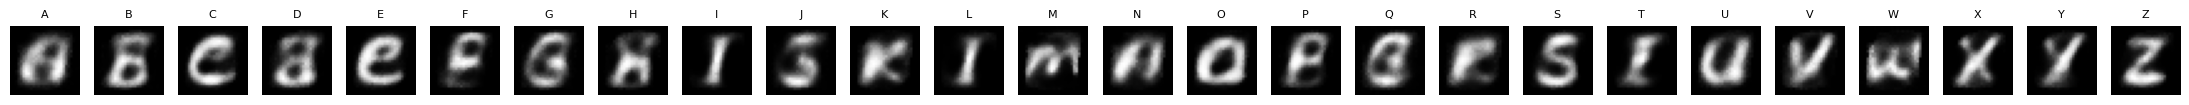

Epoch 10/100, Loss: 0.2150


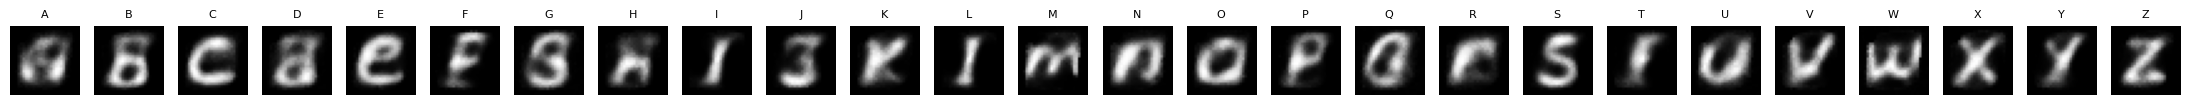

Epoch 11/100, Loss: 0.2116


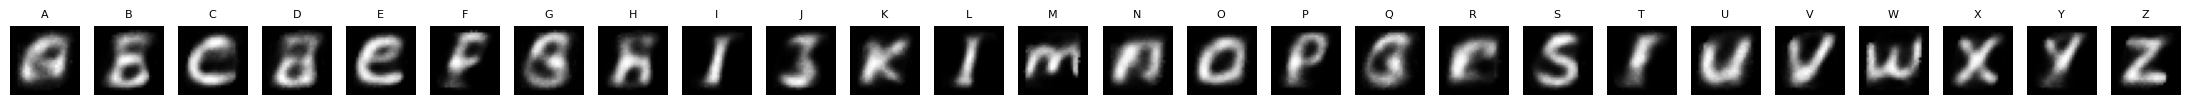

Epoch 12/100, Loss: 0.2089


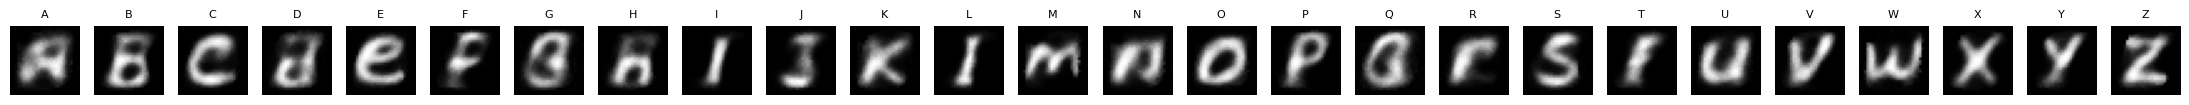

Epoch 13/100, Loss: 0.2073


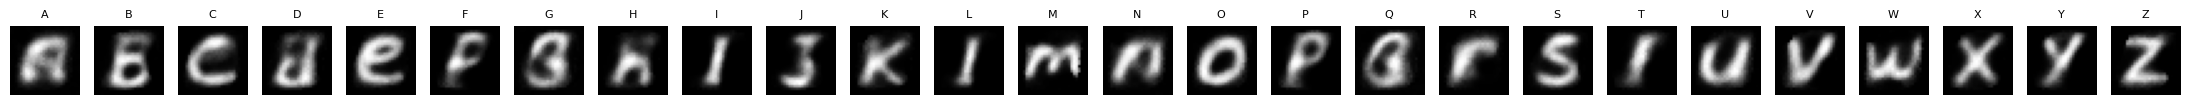

Epoch 14/100, Loss: 0.2057


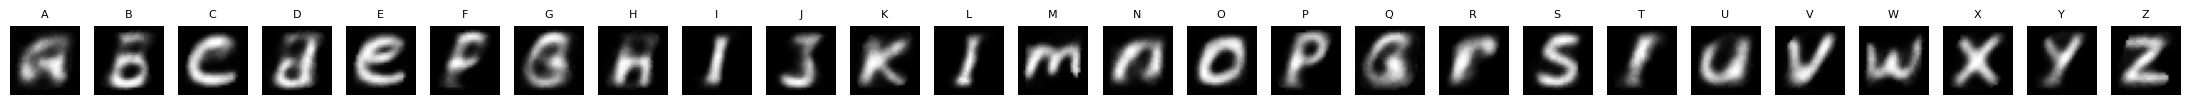

Epoch 15/100, Loss: 0.2043


2025-10-14 19:33:43.902524: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


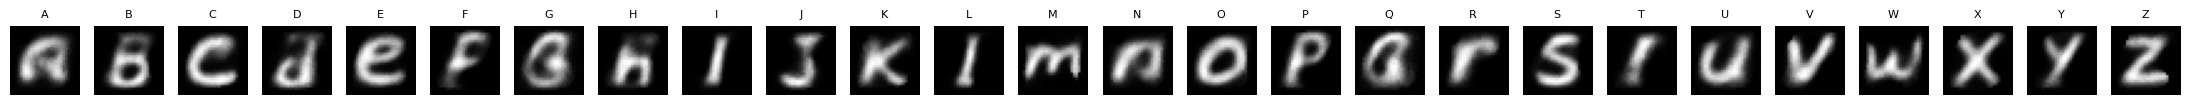

Epoch 16/100, Loss: 0.2035


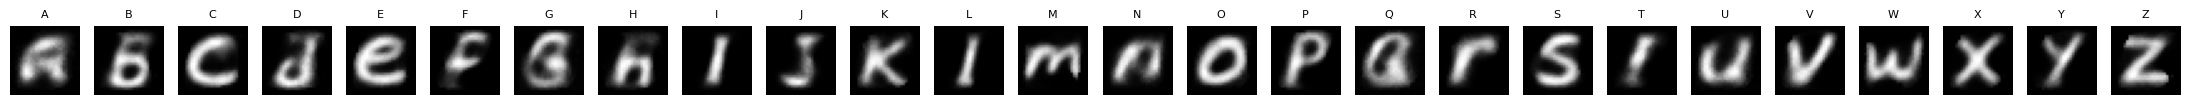

Epoch 17/100, Loss: 0.2025


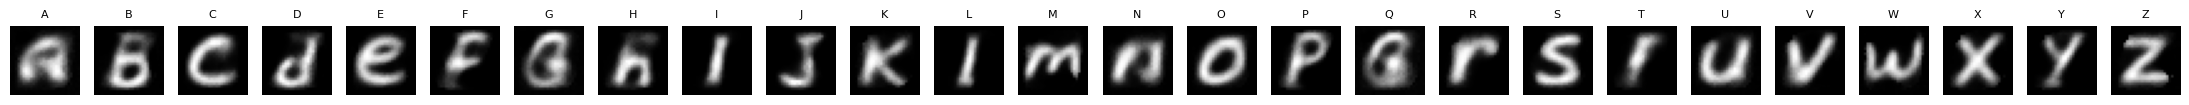

Epoch 18/100, Loss: 0.2020


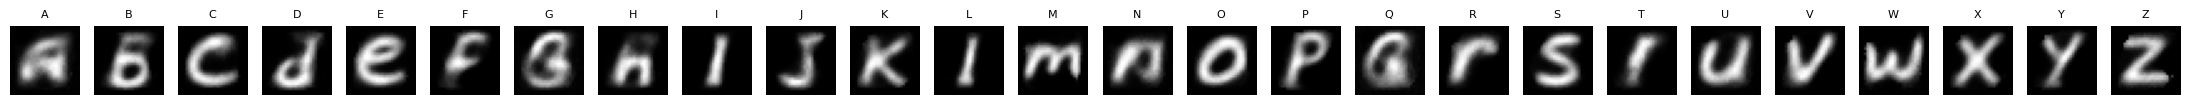

Epoch 19/100, Loss: 0.2015


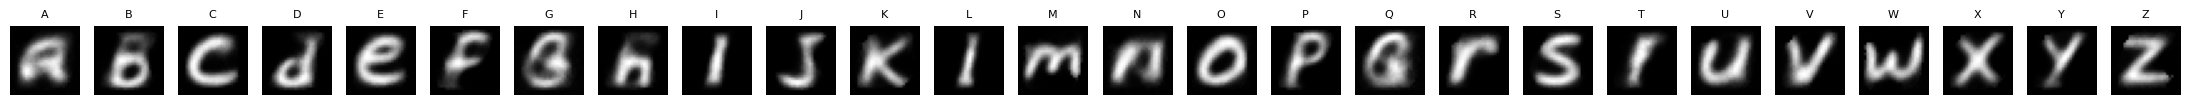

Epoch 20/100, Loss: 0.2010


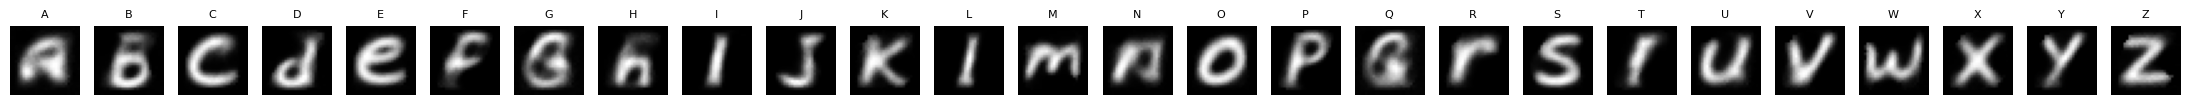

Epoch 21/100, Loss: 0.2008


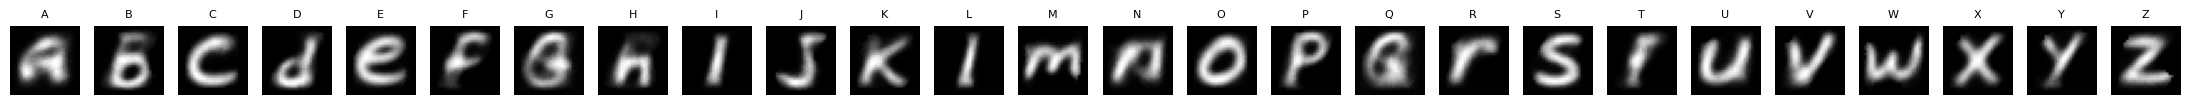

Epoch 22/100, Loss: 0.2006


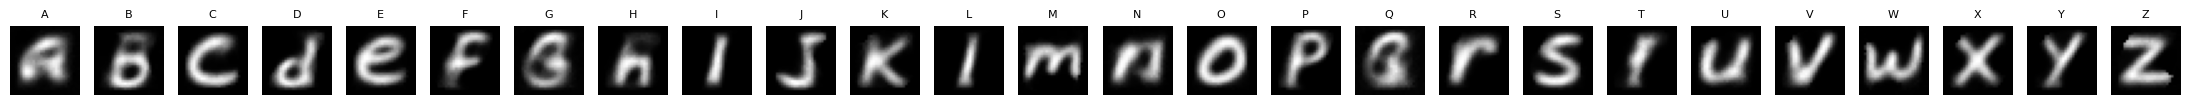

Epoch 23/100, Loss: 0.2004


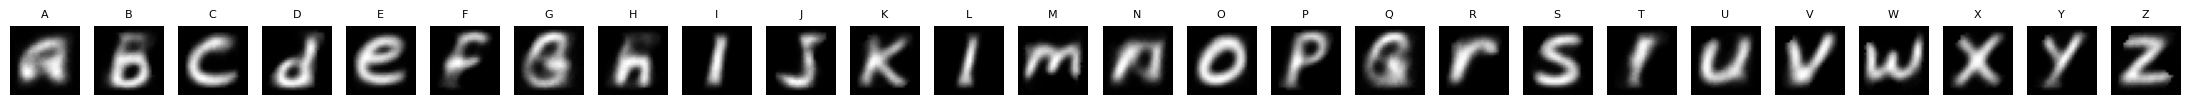

Epoch 24/100, Loss: 0.2003


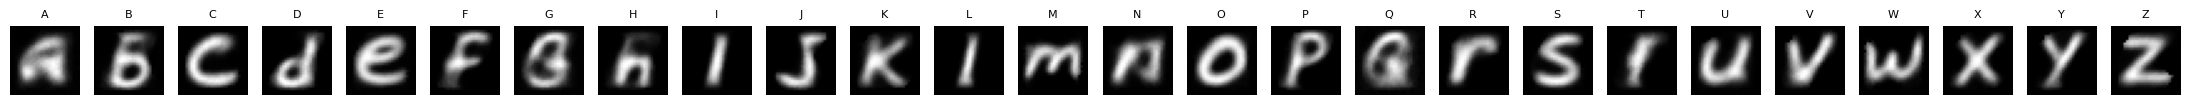

Epoch 25/100, Loss: 0.2001


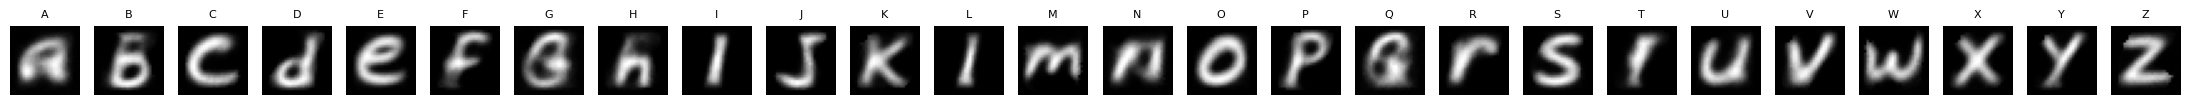

Epoch 26/100, Loss: 0.2000


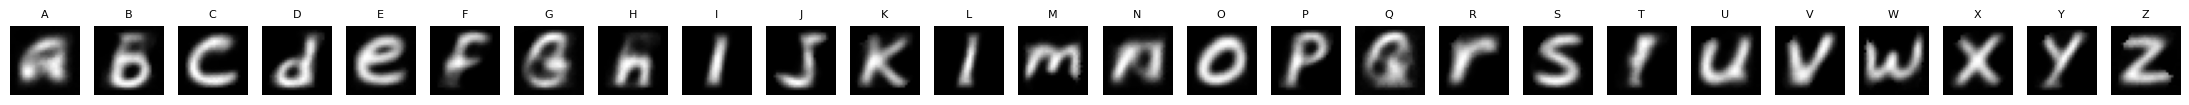

Epoch 27/100, Loss: 0.2000


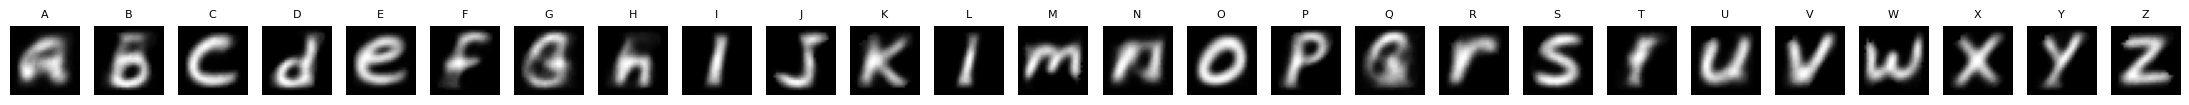

Epoch 28/100, Loss: 0.1999


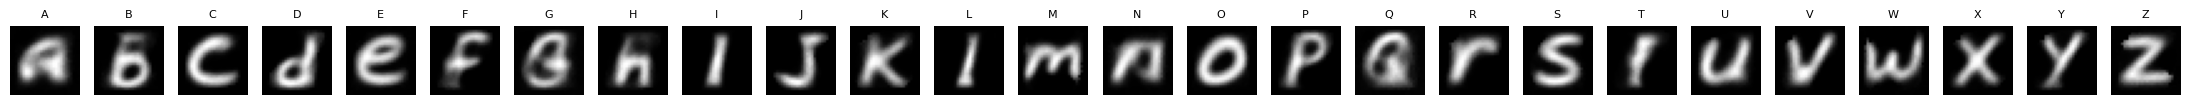

Epoch 29/100, Loss: 0.1997


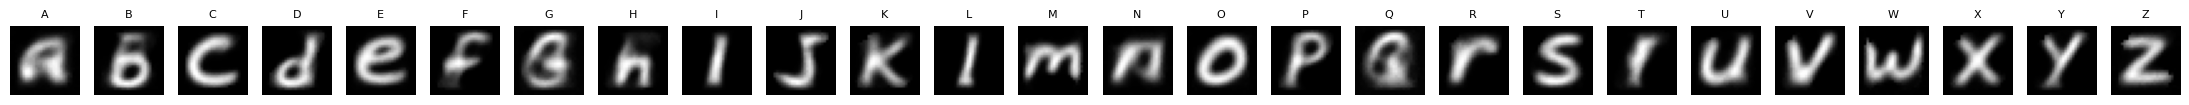

Epoch 30/100, Loss: 0.1998


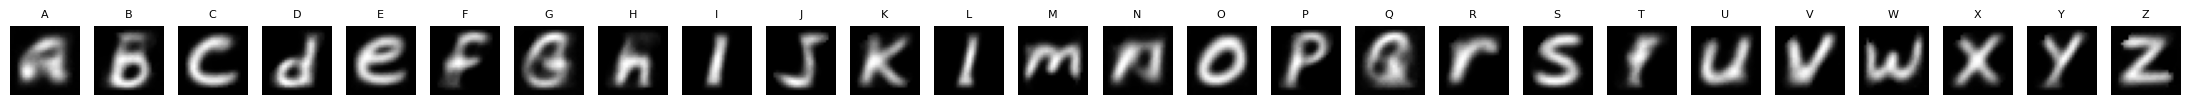

Epoch 31/100, Loss: 0.1998


2025-10-14 19:34:05.439734: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


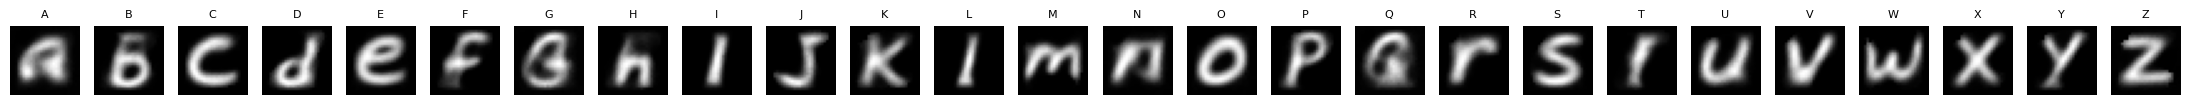

Epoch 32/100, Loss: 0.1996


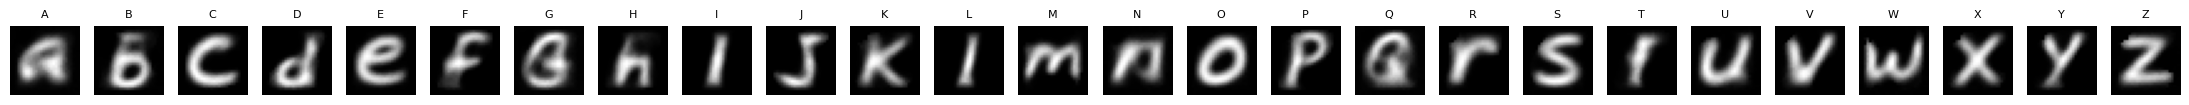

Epoch 33/100, Loss: 0.1995


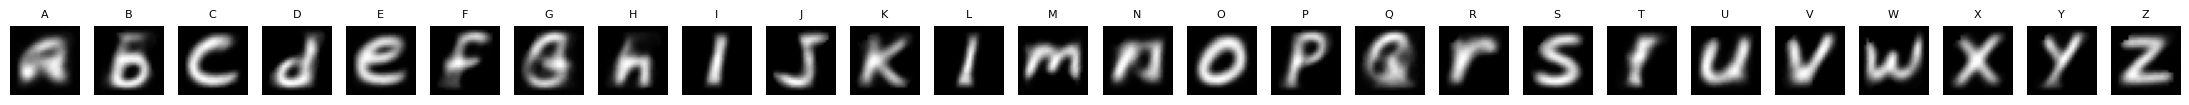

Epoch 34/100, Loss: 0.1995


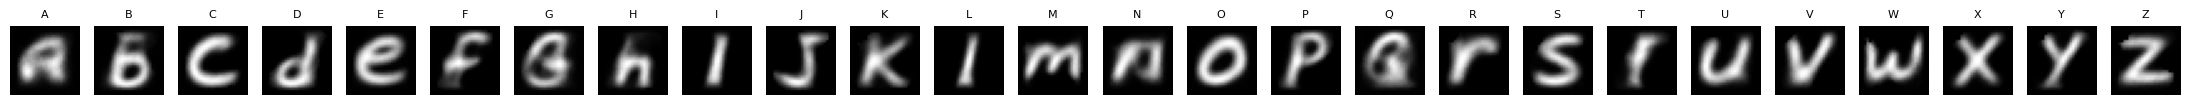

Epoch 35/100, Loss: 0.1994


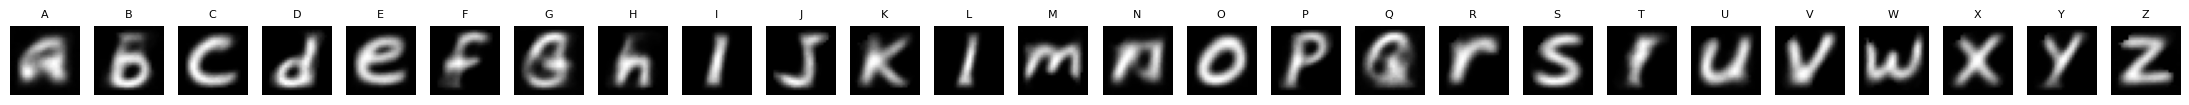

Epoch 36/100, Loss: 0.1995


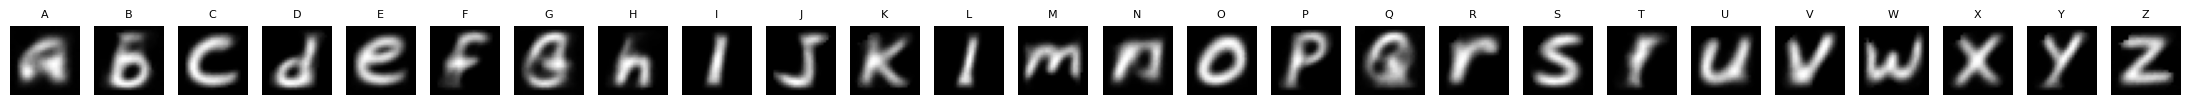

Epoch 37/100, Loss: 0.1993


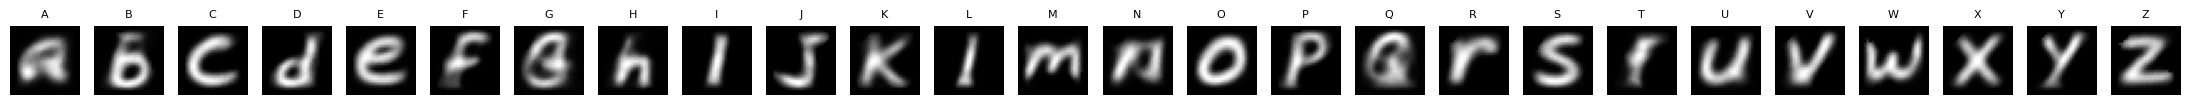

Epoch 38/100, Loss: 0.1993


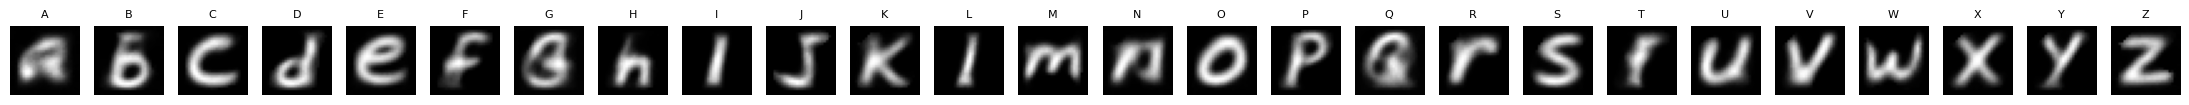

Epoch 39/100, Loss: 0.1994


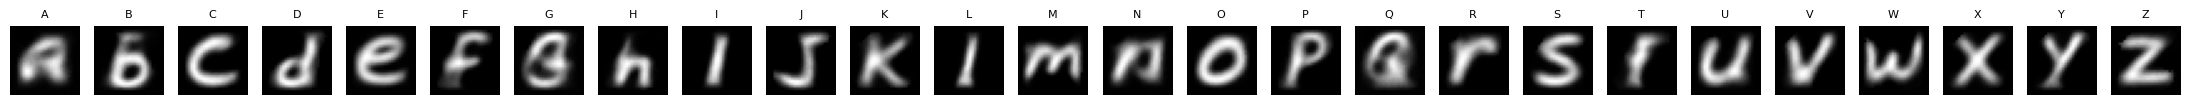

Epoch 40/100, Loss: 0.1993


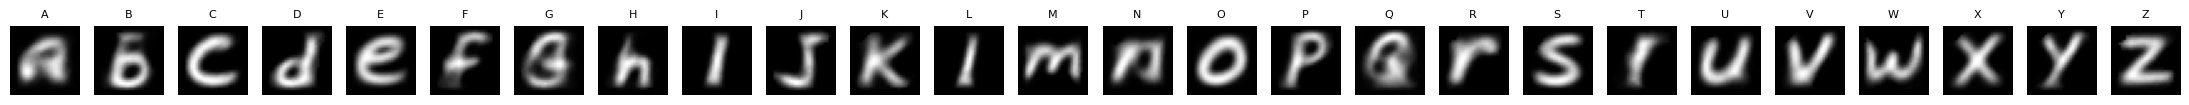

Epoch 41/100, Loss: 0.1991


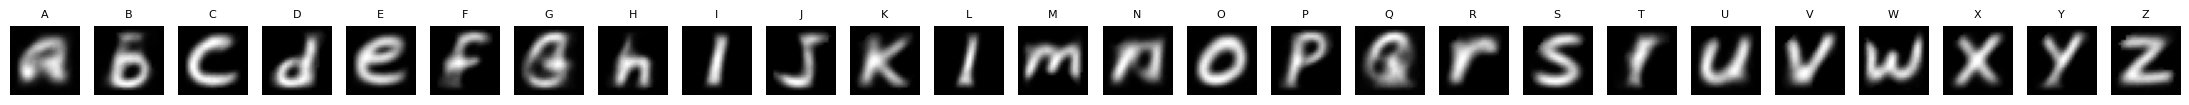

Epoch 42/100, Loss: 0.1992


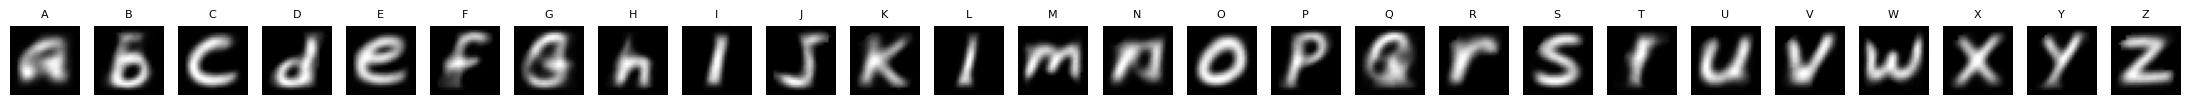

Epoch 43/100, Loss: 0.1992


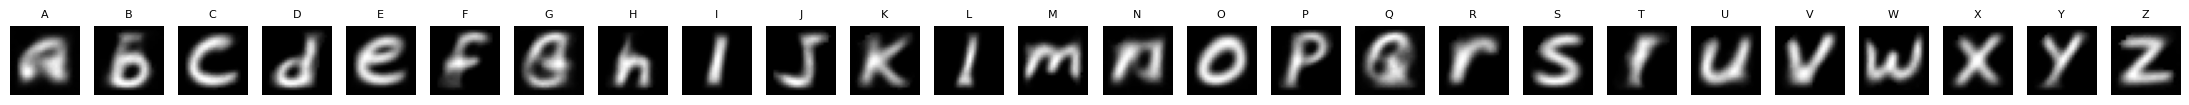

Epoch 44/100, Loss: 0.1992


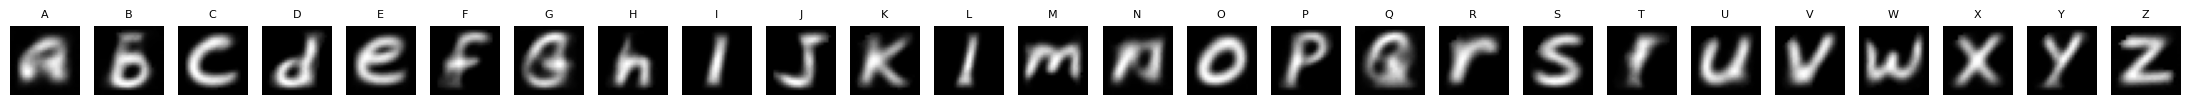

Epoch 45/100, Loss: 0.1991


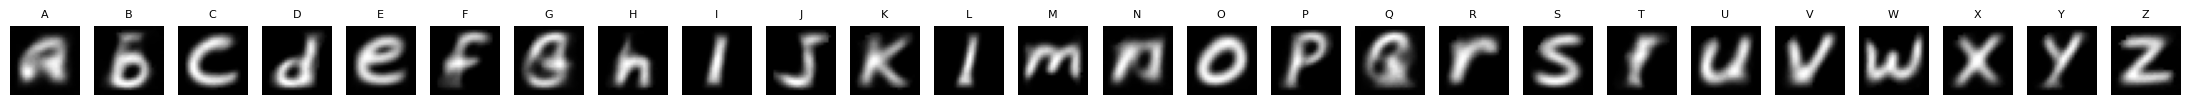

Epoch 46/100, Loss: 0.1990


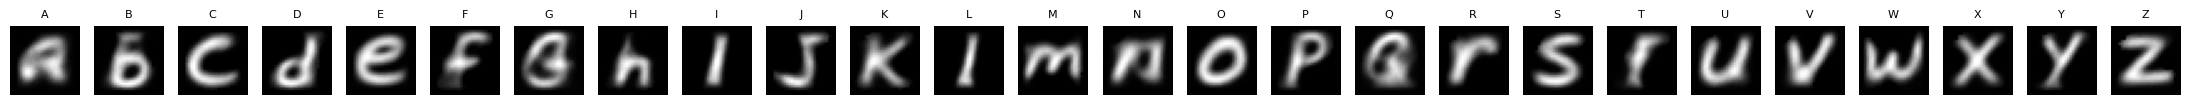

Epoch 47/100, Loss: 0.1990


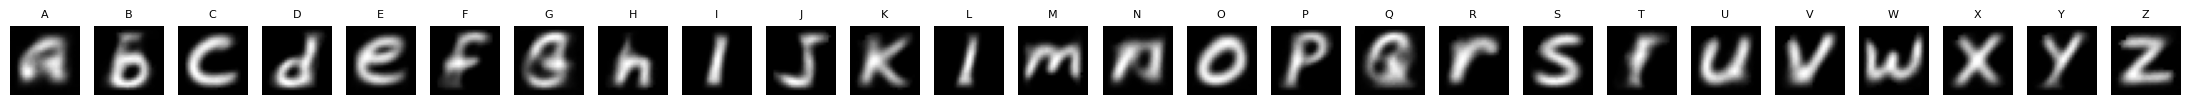

Epoch 48/100, Loss: 0.1990


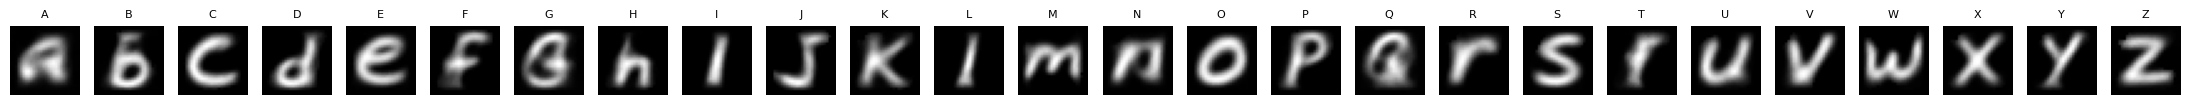

Epoch 49/100, Loss: 0.1990


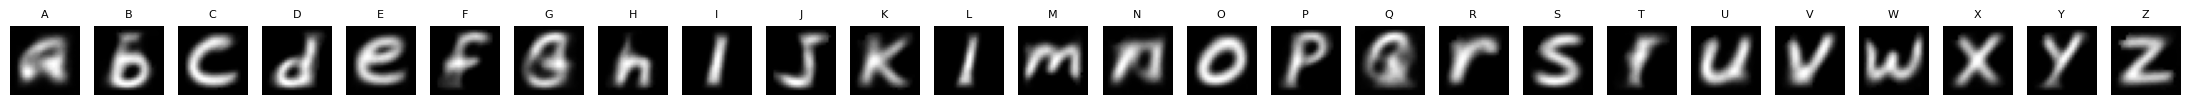

Epoch 50/100, Loss: 0.1990


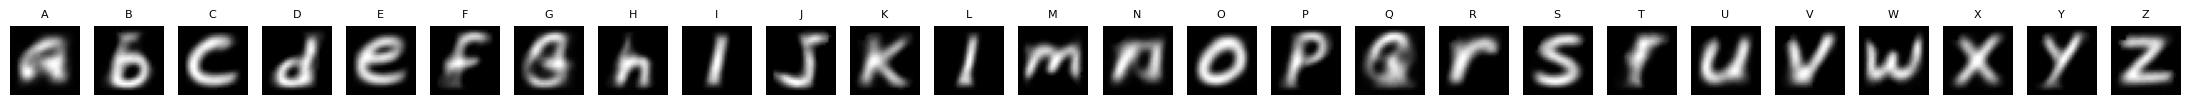

Epoch 51/100, Loss: 0.1990


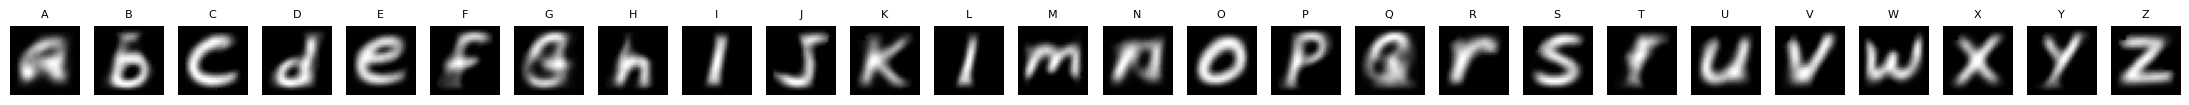

Epoch 52/100, Loss: 0.1990


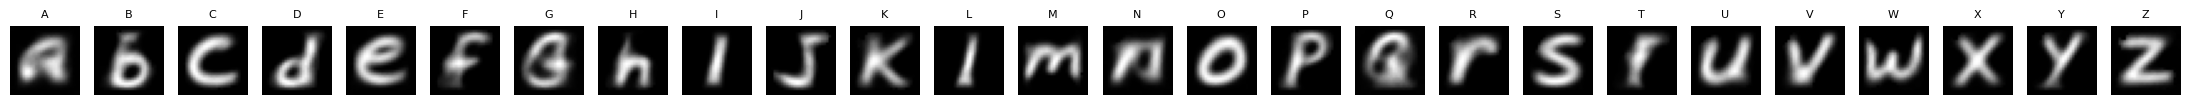

Epoch 53/100, Loss: 0.1990


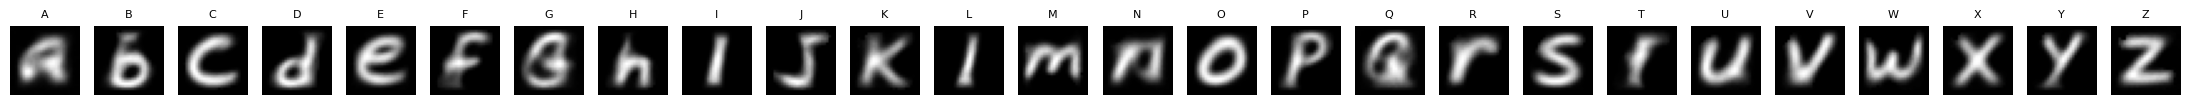

Epoch 54/100, Loss: 0.1990


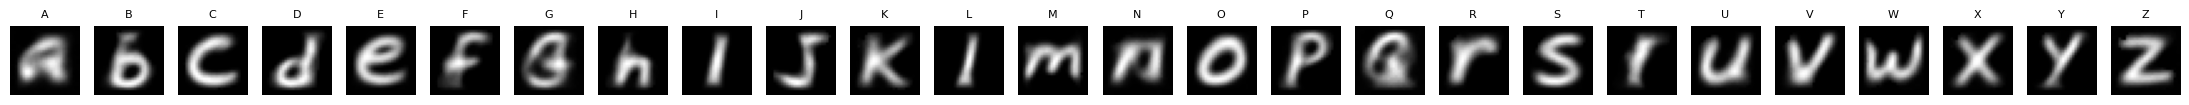

Epoch 55/100, Loss: 0.1990


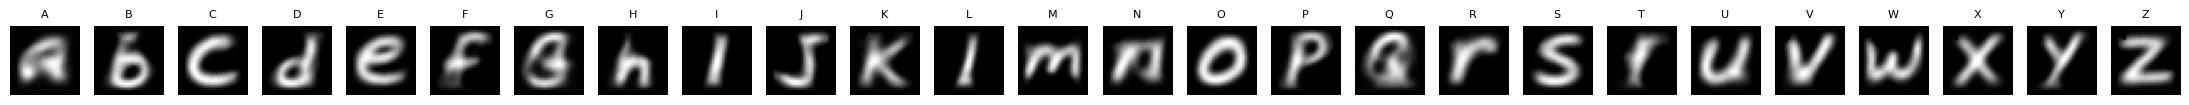

Epoch 56/100, Loss: 0.1989


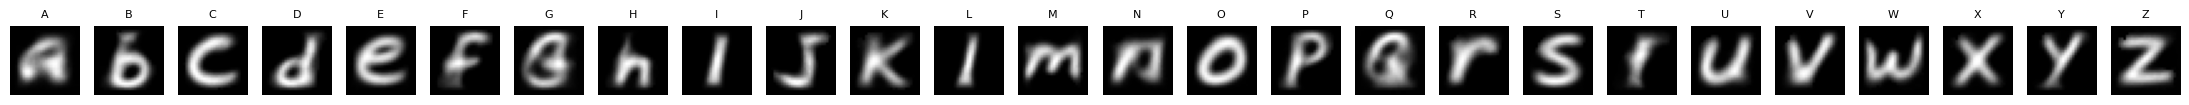

Epoch 57/100, Loss: 0.1990


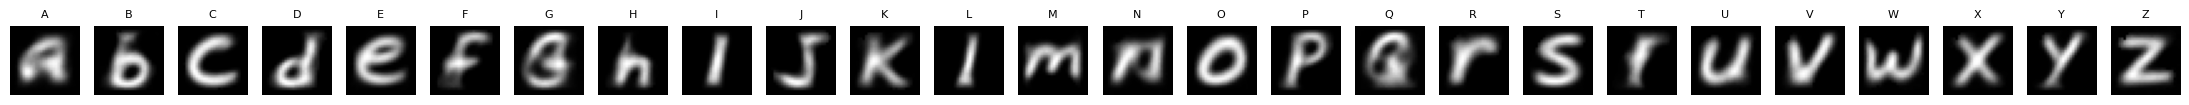

Epoch 58/100, Loss: 0.1989


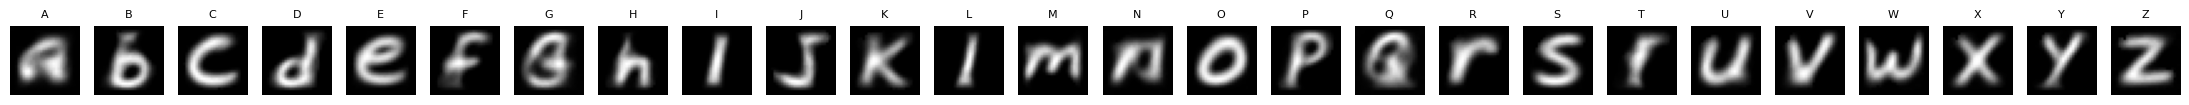

Epoch 59/100, Loss: 0.1989


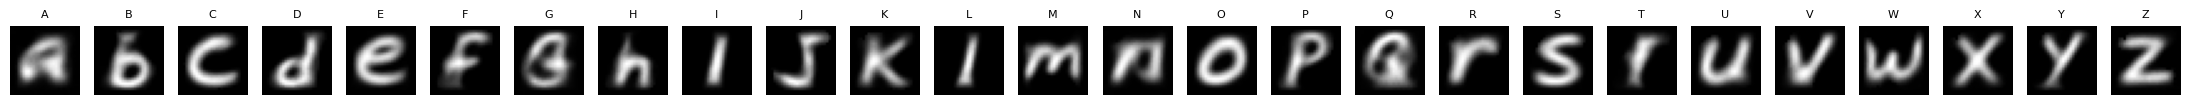

Epoch 60/100, Loss: 0.1989


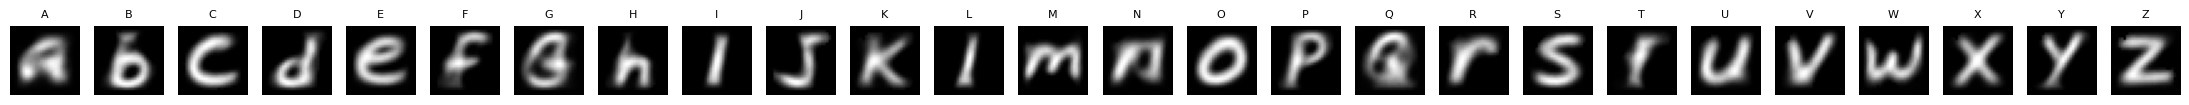

Epoch 61/100, Loss: 0.1989


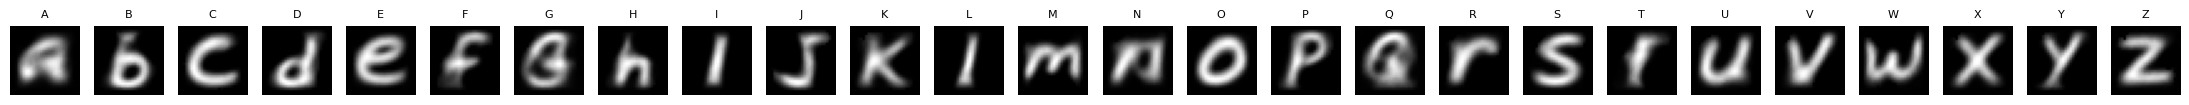

Epoch 62/100, Loss: 0.1989


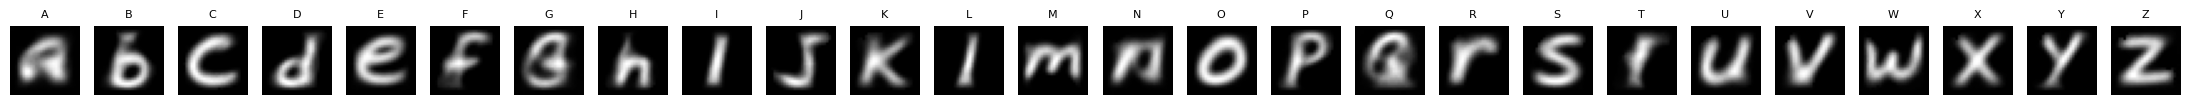

Epoch 63/100, Loss: 0.1990


2025-10-14 19:34:54.757284: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


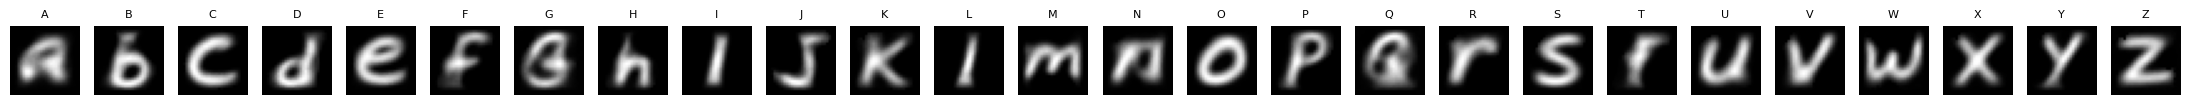

Epoch 64/100, Loss: 0.1989


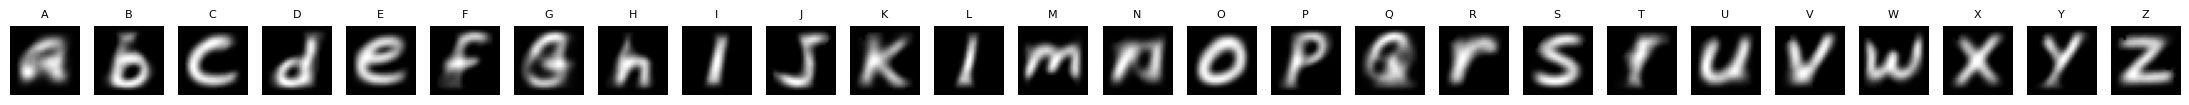

Epoch 65/100, Loss: 0.1988


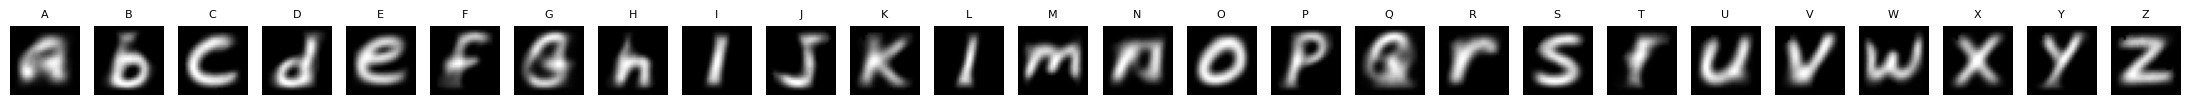

Epoch 66/100, Loss: 0.1989


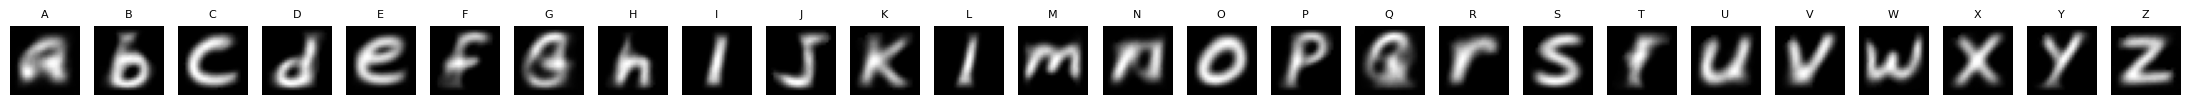

Epoch 67/100, Loss: 0.1989


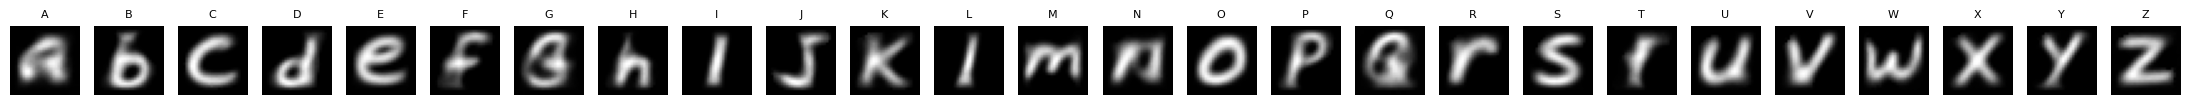

Epoch 68/100, Loss: 0.1989


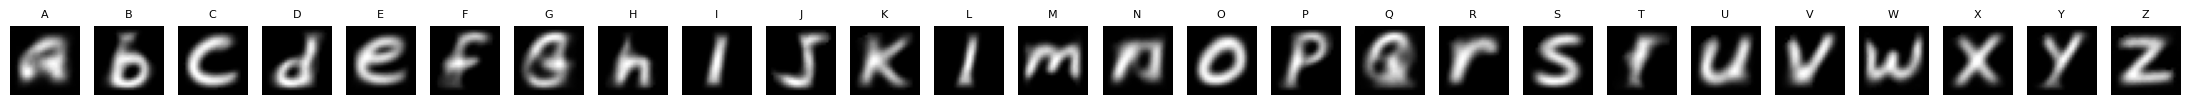

Epoch 69/100, Loss: 0.1989


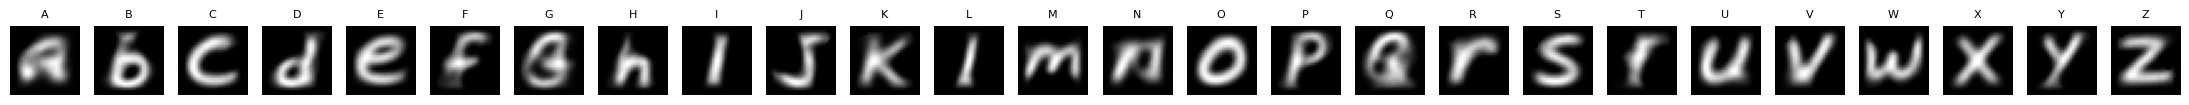

Epoch 70/100, Loss: 0.1989


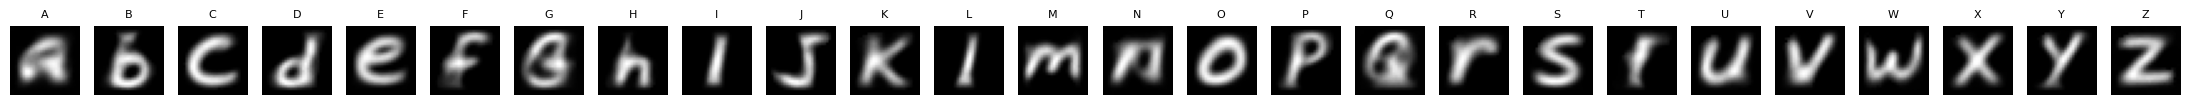

Epoch 71/100, Loss: 0.1989


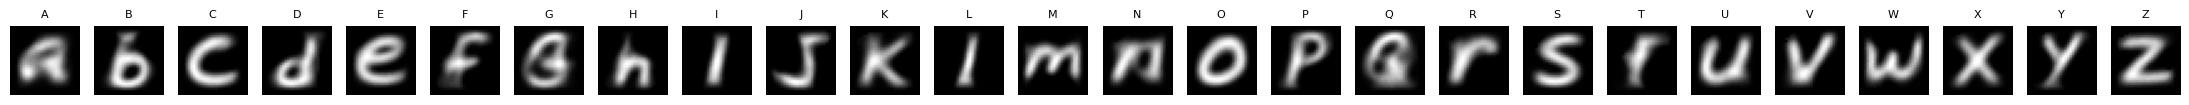

Epoch 72/100, Loss: 0.1989


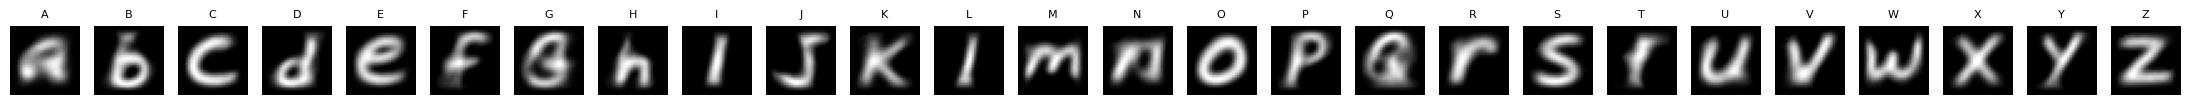

Epoch 73/100, Loss: 0.1988


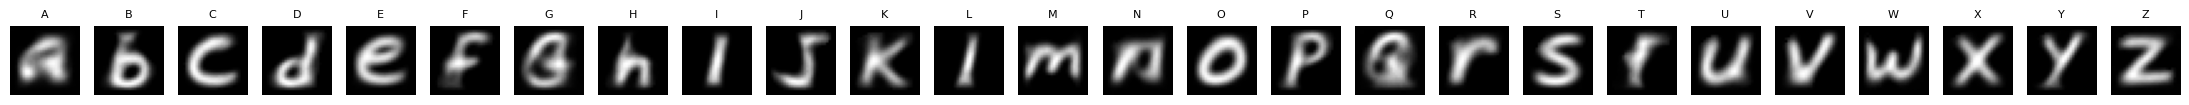

Epoch 74/100, Loss: 0.1989


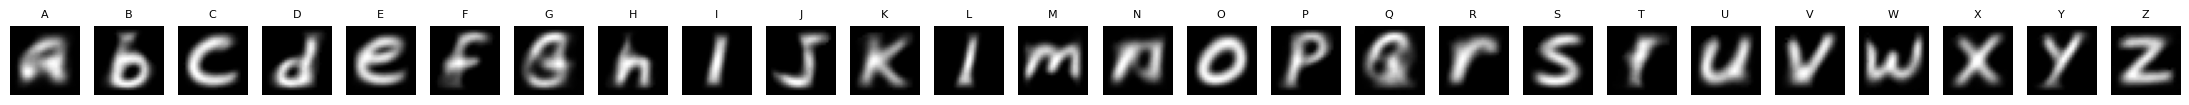

Epoch 75/100, Loss: 0.1988


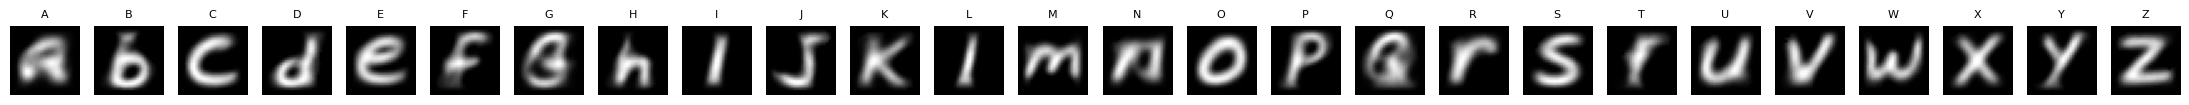

Epoch 76/100, Loss: 0.1989


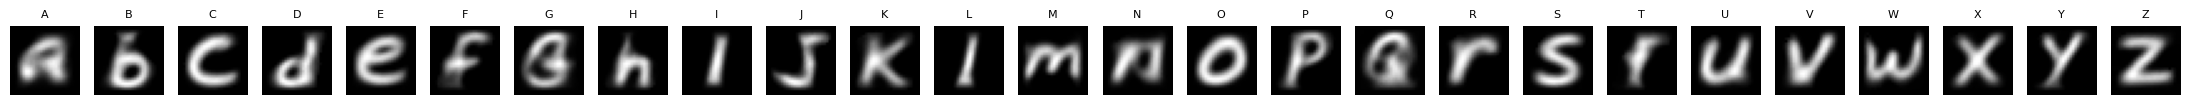

Epoch 77/100, Loss: 0.1988


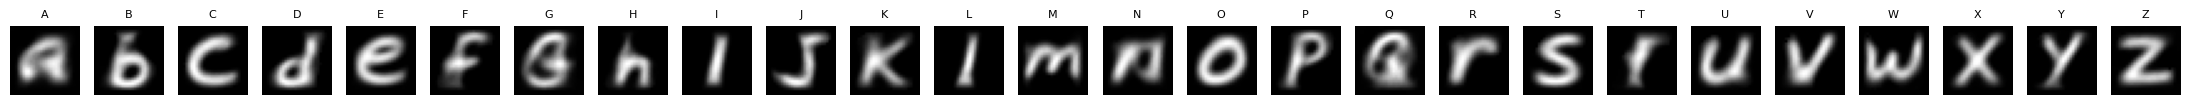

Epoch 78/100, Loss: 0.1988


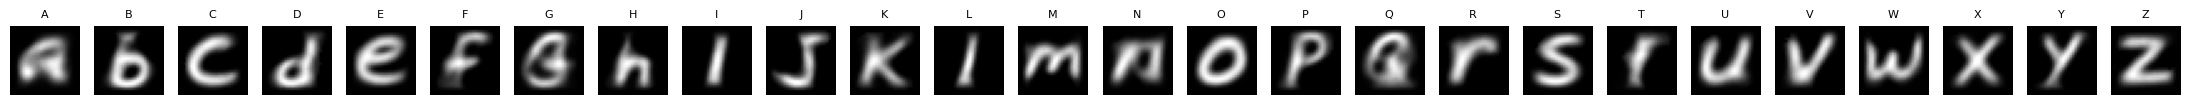

Epoch 79/100, Loss: 0.1988


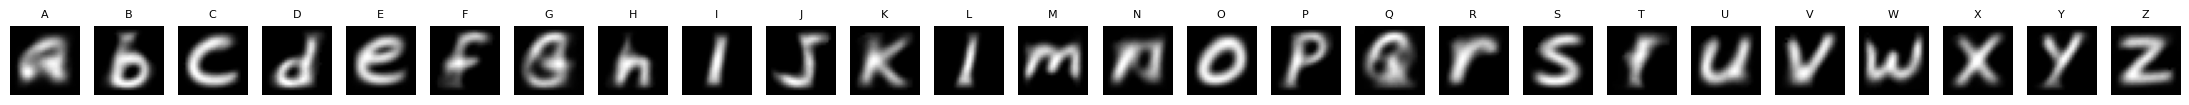

Epoch 80/100, Loss: 0.1989


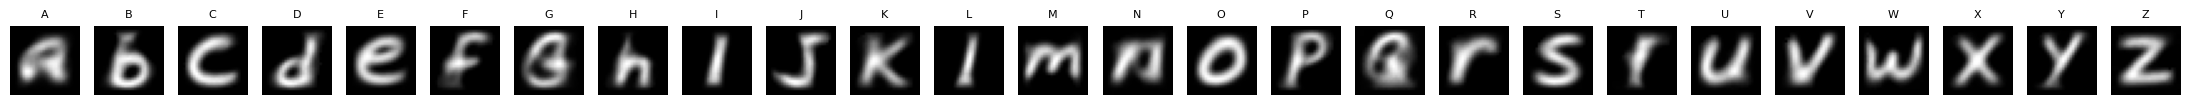

Epoch 81/100, Loss: 0.1988


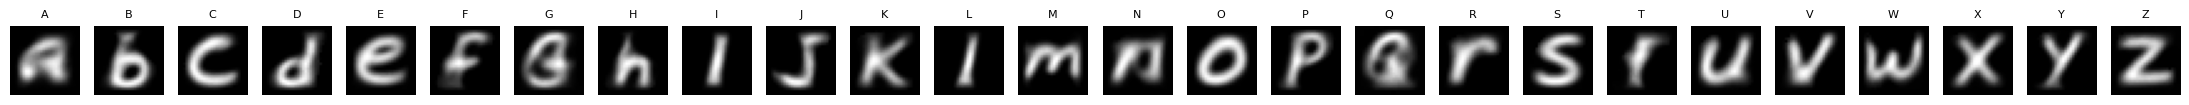

Epoch 82/100, Loss: 0.1988


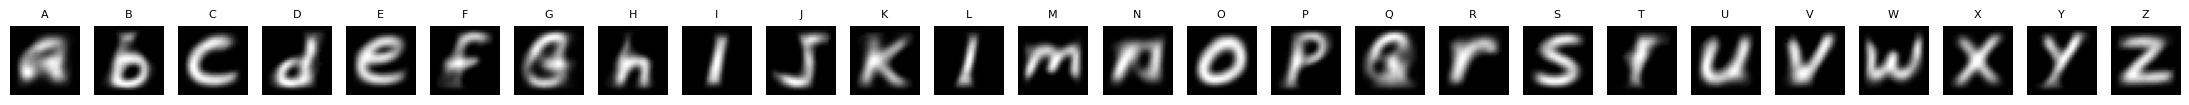

Epoch 83/100, Loss: 0.1988


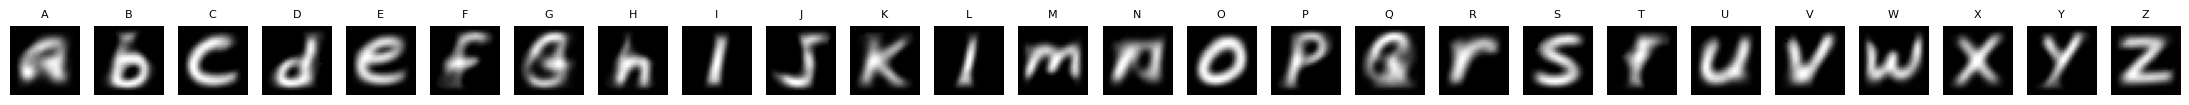

Epoch 84/100, Loss: 0.1987


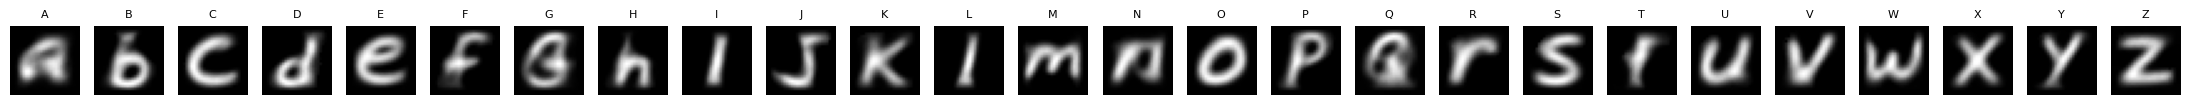

Epoch 85/100, Loss: 0.1988


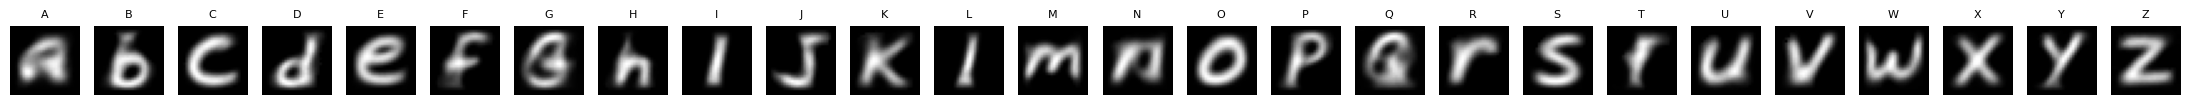

Epoch 86/100, Loss: 0.1987


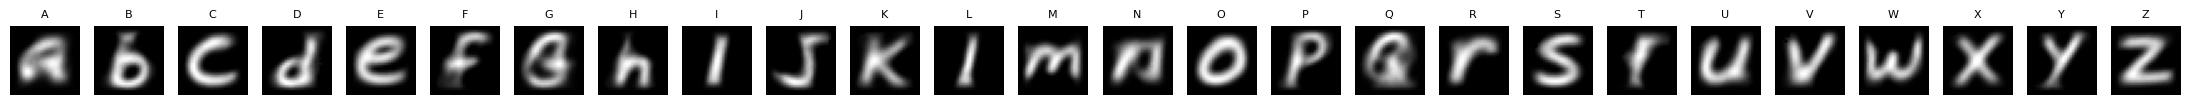

Epoch 87/100, Loss: 0.1988


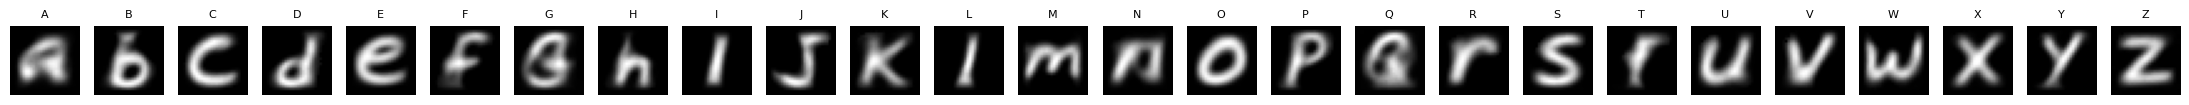

Epoch 88/100, Loss: 0.1988


KeyboardInterrupt: 

In [4]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)


@tf.function
def train_step(noise, labels, real_images):
    with tf.GradientTape() as tape:
        generated_images = g_model(noise, labels)
        loss = generator_loss(generated_images, real_images)

    gradients = tape.gradient(loss, g_model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, g_model.trainable_variables))
    return loss


epochs = 100
noise_dim = 100  # dimension of the random noise vector

for epoch in range(epochs):
    epoch_loss = 0.0
    batch_count = 0

    for real_images, labels in dataset:
        noise = tf.random.normal([tf.shape(real_images)[0], noise_dim])

        labels = tf.one_hot(labels, depth=n_class)
        labels = tf.cast(labels, tf.float32)
        loss = train_step(noise, labels, real_images)
        epoch_loss += loss
        batch_count += 1


    epoch_loss /= batch_count
    generate_all_letters(g_model, noise_dim)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss.numpy():.4f}")